In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [7]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date']).set_index('date')
df.shape

(1304, 1)

In [8]:
df.drop(df[df['value'] < df['value'].quantile(0.025)].index, inplace=True)
df.drop(df[df['value'] > df['value'].quantile(0.975)].index, inplace=True)
df.shape

(1239, 1)

In [9]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


## Fig 1

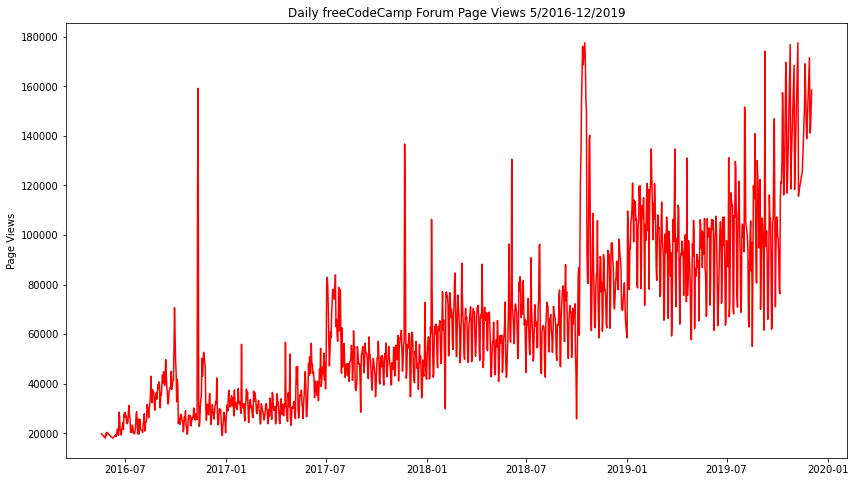

In [24]:
fig, ax = plt.subplots(figsize=(14,8))

ax.plot(df, c='red')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_ylabel('Page Views');

## Fig 2

In [147]:
df_bar.index.get_level_values(1)

Int64Index([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='month')

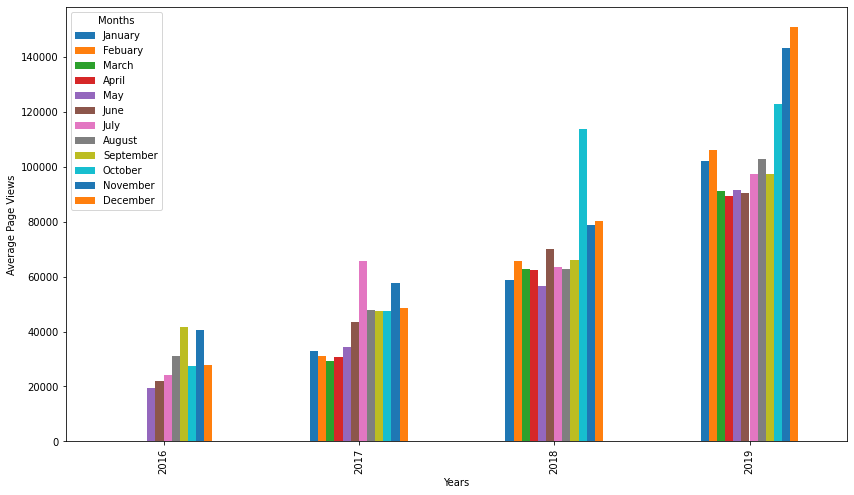

In [171]:
fig, ax = plt.subplots(figsize=(14,8))

df['year'] = df.index.year
df['month'] = df.index.month
df_bar = df.groupby(['year', 'month'])['value'].agg(['mean'])

df_bar.unstack().plot(kind='bar', ax=ax)
ax.legend(title='Months', labels=['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views');

## Fig 3

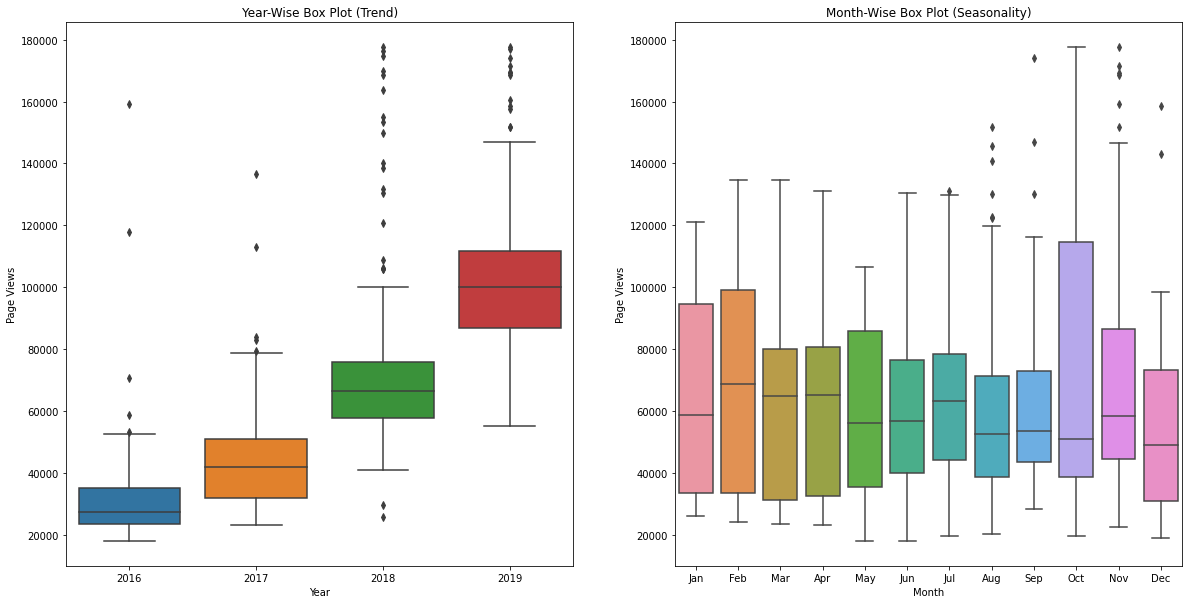

In [193]:
fig, axes = plt.subplots(1,2,figsize=(20,10))

box1 = sns.boxplot(x='year', y='value', data=df, ax=axes[0])
box1.set_title('Year-Wise Box Plot (Trend)')
box1.set_xlabel('Year')
box1.set_ylabel('Page Views')

box2 = sns.boxplot(x='month', y='value', data=df, ax=axes[1])
box2.set_title('Month-Wise Box Plot (Seasonality)')
box2.set_xlabel('Month')
box2.set_ylabel('Page Views')
box2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);